In [109]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

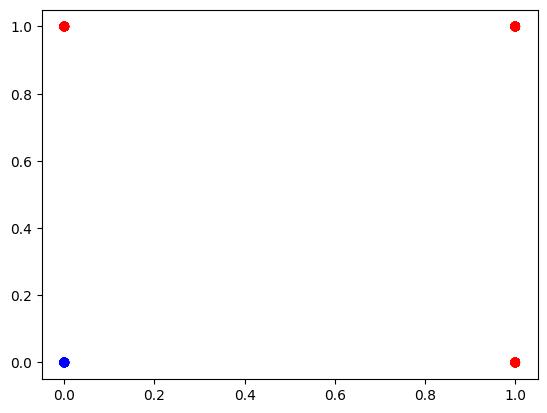

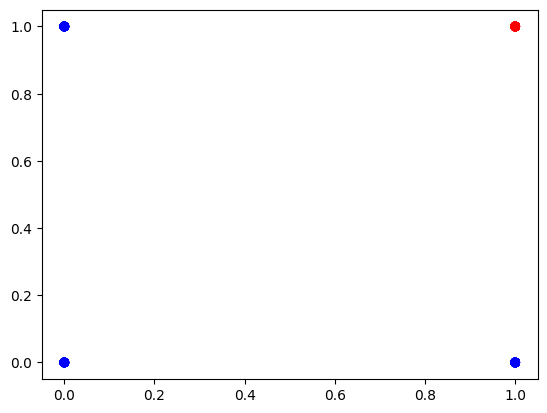

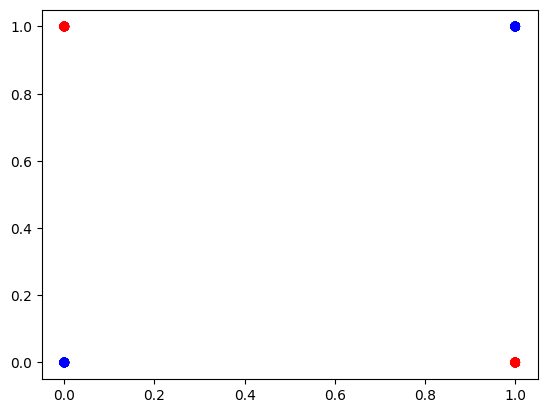

In [110]:
def generate_or_data():
    x = np.random.randint(0, 2, size=(100, 2))
    y = np.array([x[:, 0] | x[:, 1]]).T
    return x, y

def generate_and_data():
    x = np.random.randint(0, 2, size=(100, 2))
    y = np.array([x[:, 0] & x[:, 1]]).T
    return x, y

def generate_xor_data():
    x = np.random.randint(0, 2, size=(100, 2))
    y = np.array([x[:, 0] ^ x[:, 1]]).T
    return x, y

def plot_data(x, y):
    plt.scatter(x[:, 0], x[:, 1], c=y[:, 0], cmap=plt.cm.bwr)
    plt.show()

plot_data(*generate_or_data())
plot_data(*generate_and_data())
plot_data(*generate_xor_data())

# OR

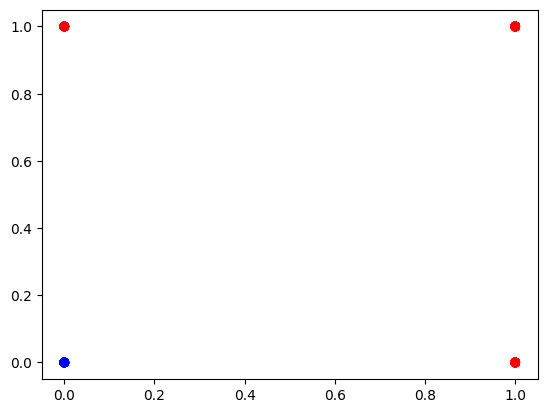

loss: 0.2425, accuracy: 0.7300
loss: 0.1676, accuracy: 0.7300
loss: 0.1382, accuracy: 0.7300
loss: 0.1136, accuracy: 0.7300
loss: 0.0941, accuracy: 1.0000
loss: 0.0793, accuracy: 1.0000
loss: 0.0680, accuracy: 1.0000
loss: 0.0592, accuracy: 1.0000
loss: 0.0521, accuracy: 1.0000
loss: 0.0463, accuracy: 1.0000


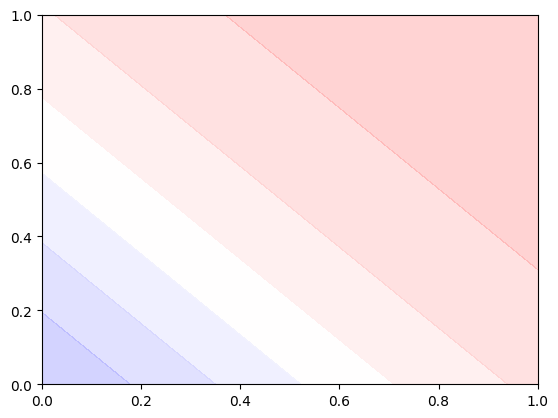

In [111]:
class Model(tf.Module):
    def __init__(self):
        self.w = tf.Variable(tf.random.uniform(shape=[2, 1], minval=-1, maxval=1))
        self.b = tf.Variable(tf.random.uniform(shape=[1], minval=-1, maxval=1))

    def __call__(self, x):
        y = tf.sigmoid(tf.matmul(x, self.w) + self.b)
        return y

model = Model()

def loss_fn(x, y):
    return tf.reduce_mean(tf.square(model(x) - y))

def train(x, y, lr=0.1):
    with tf.GradientTape() as tape:
        loss = loss_fn(x, y)
    grads = tape.gradient(loss, [model.w, model.b])
    model.w.assign_sub(lr * grads[0])
    model.b.assign_sub(lr * grads[1])

def predict(x):
    return model(x)

def accuracy(x, y):
    return tf.reduce_mean(tf.cast(tf.equal(tf.round(predict(x)), y), tf.float32))

def plot_decision_boundary():
    x = np.linspace(0, 1, 100)
    y = np.linspace(0, 1, 100)
    x = tf.constant(x, dtype=tf.float32)
    y = tf.constant(y, dtype=tf.float32)
    xx, yy = np.meshgrid(x, y)
    z = predict(np.c_[xx.ravel(), yy.ravel()])
    z = z.numpy().reshape(xx.shape)
    plt.contourf(xx, yy, z, cmap=plt.cm.bwr, alpha=0.2)
    plt.show()

x, y = generate_or_data()

x = tf.constant(x, dtype=tf.float32)
y = tf.constant(y, dtype=tf.float32)

plot_data(x, y)

for i in range(1000):
    train(x, y)
    if i % 100 == 0:
        print('loss: {:.4f}, accuracy: {:.4f}'.format(loss_fn(x, y), accuracy(x, y)))

plot_decision_boundary()

# AND

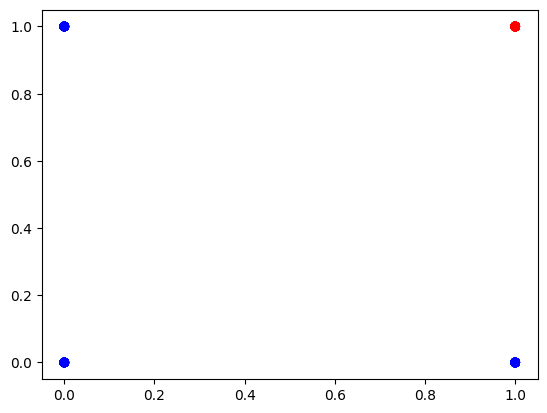

loss: 0.3319, accuracy: 0.2100
loss: 0.2324, accuracy: 0.7200
loss: 0.1837, accuracy: 0.7200
loss: 0.1502, accuracy: 0.7200
loss: 0.1269, accuracy: 1.0000
loss: 0.1100, accuracy: 1.0000
loss: 0.0971, accuracy: 1.0000
loss: 0.0869, accuracy: 1.0000
loss: 0.0786, accuracy: 1.0000
loss: 0.0717, accuracy: 1.0000


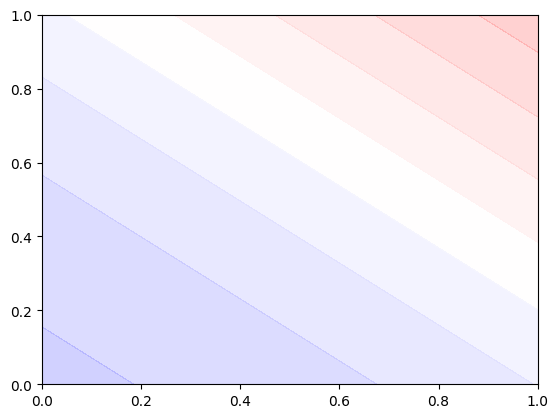

In [112]:
model = Model()

x, y = generate_and_data()

x = tf.constant(x, dtype=tf.float32)
y = tf.constant(y, dtype=tf.float32)

plot_data(x, y)

for i in range(1000):
    train(x, y)
    if i % 100 == 0:
        print('loss: {:.4f}, accuracy: {:.4f}'.format(loss_fn(x, y), accuracy(x, y)))

plot_decision_boundary()

# XOR

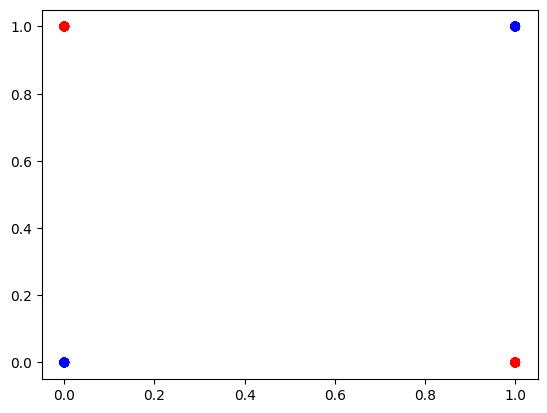

loss: 0.2518, accuracy: 0.5400
loss: 0.2489, accuracy: 0.5400
loss: 0.0197, accuracy: 1.0000
loss: 0.0000, accuracy: 1.0000
loss: 0.0000, accuracy: 1.0000
loss: 0.0000, accuracy: 1.0000
loss: 0.0000, accuracy: 1.0000
loss: 0.0000, accuracy: 1.0000
loss: 0.0000, accuracy: 1.0000
loss: 0.0000, accuracy: 1.0000
[[3.6620448e-04 3.6489990e-04 3.6416994e-04 ... 9.9970269e-01
  9.9970680e-01 9.9971050e-01]
 [3.6787422e-04 3.6599176e-04 3.6469978e-04 ... 9.9969786e-01
  9.9970257e-01 9.9970675e-01]
 [3.7012980e-04 3.6764739e-04 3.6578014e-04 ... 9.9969238e-01
  9.9969774e-01 9.9970245e-01]
 ...
 [9.9968821e-01 9.9968249e-01 9.9967605e-01 ... 3.4975904e-04
  3.4934134e-04 3.4930272e-04]
 [9.9969304e-01 9.9968791e-01 9.9968219e-01 ... 3.5042004e-04
  3.4962635e-04 3.4921500e-04]
 [9.9969733e-01 9.9969280e-01 9.9968767e-01 ... 3.5145655e-04
  3.5028011e-04 3.4949422e-04]]


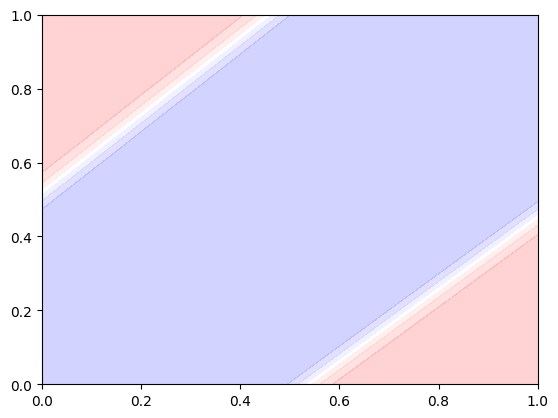

In [117]:
class Layer(tf.Module):
    def __init__(self, out_dim, weight_init=tf.random.uniform, activation=tf.identity):
        self.out_dim = out_dim
        self.weight_init = weight_init
        self.activation = activation
        self.w = None
        self.b = None

    @tf.function
    def __call__(self, x):
        self.in_dim = x.shape[1]
        if self.w is None:
            self.w = tf.Variable(self.weight_init(shape=[self.in_dim, self.out_dim]))
        if self.b is None:
            self.b = tf.Variable(tf.zeros(shape=[self.out_dim]))
        z = tf.add(tf.matmul(x, self.w), self.b)
        return self.activation(z)

class MLP(tf.Module):
    def __init__(self, layers):
        self.layers = layers

    @tf.function
    def __call__(self, x, preds=False): 
        for layer in self.layers:
            x = layer(x)
        return x

model = MLP([
    Layer(2, activation=tf.nn.sigmoid),
    Layer(1, activation=tf.nn.sigmoid)
])

x, y = generate_xor_data()

x = tf.constant(x, dtype=tf.float32)
y = tf.constant(y, dtype=tf.float32)

plot_data(x, y)

def accuracy(x, y):
    return tf.reduce_mean(tf.cast(tf.equal(tf.round(model(x)), y), tf.float32))

def loss_fn(x, y):
    return tf.reduce_mean(tf.square(model(x) - y))

def train(x, y, lr=0.1):
    with tf.GradientTape() as tape:
        loss = loss_fn(x, y)
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    grads = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))

def plot_decision_boundary():
    x = np.linspace(0, 1, 100)
    y = np.linspace(0, 1, 100)
    x = tf.constant(x, dtype=tf.float32)
    y = tf.constant(y, dtype=tf.float32)
    xx, yy = np.meshgrid(x, y)
    z = model(np.c_[xx.ravel(), yy.ravel()])
    z = z.numpy().reshape(xx.shape)
    print(z)
    plt.contourf(xx, yy, z, cmap=plt.cm.bwr, alpha=0.2)
    plt.show()

for i in range(1000):
    train(x, y)
    if i % 100 == 0:
        print('loss: {:.4f}, accuracy: {:.4f}'.format(loss_fn(x, y), accuracy(x, y)))

plot_decision_boundary()

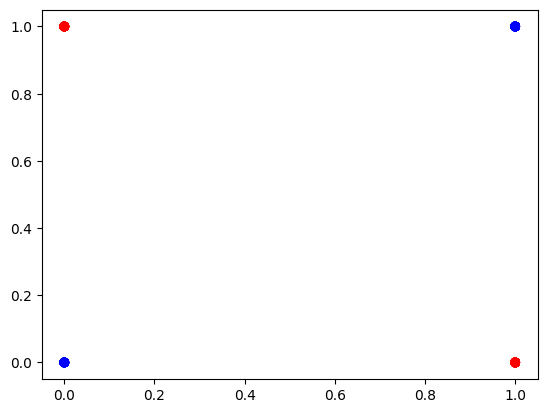

loss: 0.4081, accuracy: 0.5300
loss: 0.0052, accuracy: 1.0000
loss: 0.0000, accuracy: 1.0000
loss: 0.0000, accuracy: 1.0000
loss: 0.0000, accuracy: 1.0000
loss: 0.0000, accuracy: 1.0000
loss: 0.0000, accuracy: 1.0000
loss: 0.0000, accuracy: 1.0000
loss: 0.0000, accuracy: 1.0000
loss: 0.0000, accuracy: 1.0000
[[1.2860990e-07 1.0101138e-02 2.0202145e-02 ... 9.7979796e-01
  9.8989898e-01 1.0000000e+00]
 [1.0101138e-02 2.0202145e-02 3.0303152e-02 ... 9.8989898e-01
  1.0000000e+00 1.0101011e+00]
 [2.0202145e-02 3.0303152e-02 4.0404167e-02 ... 1.0000000e+00
  1.0101010e+00 1.0202020e+00]
 ...
 [9.7979796e-01 9.8989898e-01 1.0000000e+00 ... 4.2354677e-02
  3.1879995e-02 2.1405192e-02]
 [9.8989898e-01 1.0000000e+00 1.0101010e+00 ... 3.1651709e-02
  2.1176906e-02 1.0702225e-02]
 [1.0000000e+00 1.0101011e+00 1.0160241e+00 ... 2.0948501e-02
  1.0473820e-02 0.0000000e+00]]


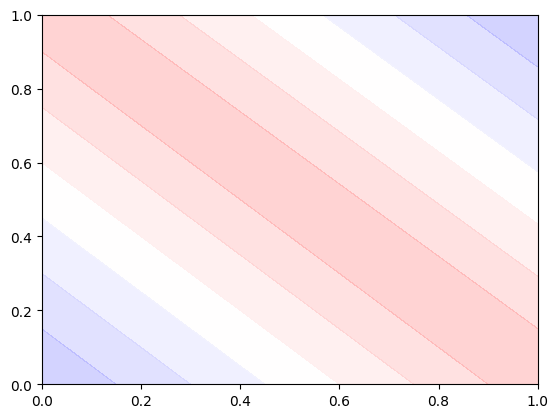

In [119]:
class Layer(tf.Module):
    def __init__(self, out_dim, weight_init=tf.random.uniform, activation=tf.identity):
        self.out_dim = out_dim
        self.weight_init = weight_init
        self.activation = activation
        self.w = None
        self.b = None

    @tf.function
    def __call__(self, x):
        self.in_dim = x.shape[1]
        if self.w is None:
            self.w = tf.Variable(self.weight_init(shape=[self.in_dim, self.out_dim]))
        if self.b is None:
            self.b = tf.Variable(tf.zeros(shape=[self.out_dim]))
        z = tf.add(tf.matmul(x, self.w), self.b)
        return self.activation(z)

class MLP(tf.Module):
    def __init__(self, layers):
        self.layers = layers

    @tf.function
    def __call__(self, x, preds=False): 
        for layer in self.layers:
            x = layer(x)
        return x

model = MLP([
    Layer(2, activation=tf.nn.relu),
    Layer(1, activation=tf.nn.relu)
])

x, y = generate_xor_data()

x = tf.constant(x, dtype=tf.float32)
y = tf.constant(y, dtype=tf.float32)

plot_data(x, y)

def accuracy(x, y):
    return tf.reduce_mean(tf.cast(tf.equal(tf.round(model(x)), y), tf.float32))

def loss_fn(x, y):
    return tf.reduce_mean(tf.square(model(x) - y))

def train(x, y, lr=0.1):
    with tf.GradientTape() as tape:
        loss = loss_fn(x, y)
    optimizer = tf.keras.optimizers.Adagrad(learning_rate=lr)
    grads = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))

def plot_decision_boundary():
    x = np.linspace(0, 1, 100)
    y = np.linspace(0, 1, 100)
    x = tf.constant(x, dtype=tf.float32)
    y = tf.constant(y, dtype=tf.float32)
    xx, yy = np.meshgrid(x, y)
    z = model(np.c_[xx.ravel(), yy.ravel()])
    z = z.numpy().reshape(xx.shape)
    print(z)
    plt.contourf(xx, yy, z, cmap=plt.cm.bwr, alpha=0.2)
    plt.show()

for i in range(1000):
    train(x, y)
    if i % 100 == 0:
        print('loss: {:.4f}, accuracy: {:.4f}'.format(loss_fn(x, y), accuracy(x, y)))

plot_decision_boundary()